In [1]:
#openstreetmap (osm) official library
import osmnx as ox
#pyplot for displaying maps and routes
import matplotlib.pyplot as plt 
#custom function library including the a* implementation, heuristic and
import functions

In [2]:
#define the 'local area'
hobart_cbd = (-42.882437, 147.327525)

In [3]:
#create graph of possible routes in defined area from osm data
G = ox.graph_from_point(hobart_cbd, dist=200, network_type="walk")

In [4]:
#define various routes through the area

#path 0
#from_coord = (-42.881292, 147.327159)
#to_coord = (-42.880703, 147.325831)

#path 1
from_coord = (-42.8815708, 147.3295377)
to_coord = (-42.8831182, 147.3298404)

#path 2
#from_coord = (-42.8841353, 147.3255734)
#to_coord = (-42.881292, 147.327159)

In [5]:
#create geopandas dataframe of all nodes
gdf_nodes, _ = ox.graph_to_gdfs(G)

In [6]:
#returns a function (weight) that determines the weight of an edge in the multidigraph
def get_weight(G, weight):
    return lambda u, v, d: min(attr.get(weight, 1) for attr in d.values())

#weight graph
weight = get_weight(G, "weight")

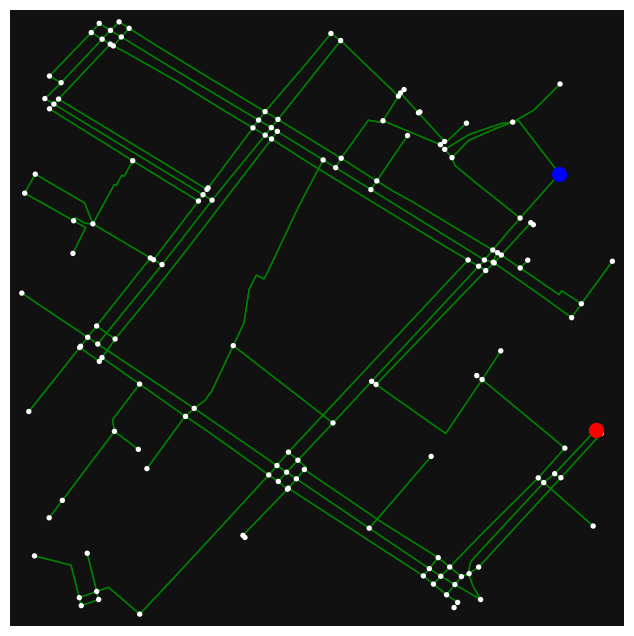

In [7]:
#plot local area and start/ end in blue/ red respectively 
fig, ax = ox.plot_graph(G, show=False, close=False, edge_color="green")

ax.scatter(from_coord[1], from_coord[0], c = "blue", s = 100)
ax.scatter(to_coord[1], to_coord[0], c = "red", s = 100)

plt.show()

In [8]:
#map position and destination to nodes in G
from_node, to_node = functions.map_to_graph(G, from_coord, to_coord, gdf_nodes)

In [9]:
from timeit import default_timer as timer

#execute the a* search with timing function
start = timer()
route = functions.a_star_routing(G, from_node, to_node, weight, gdf_nodes)
end = timer()

In [10]:
print("Time to resolve(s) : " + str(end - start))
print("Path length: " + str(sum(weight(u, v, G[u][v]) for u, v in zip(route[:-1], route[1:]))))

Time to resolve(s) : 0.05472430004738271
Path length: 12


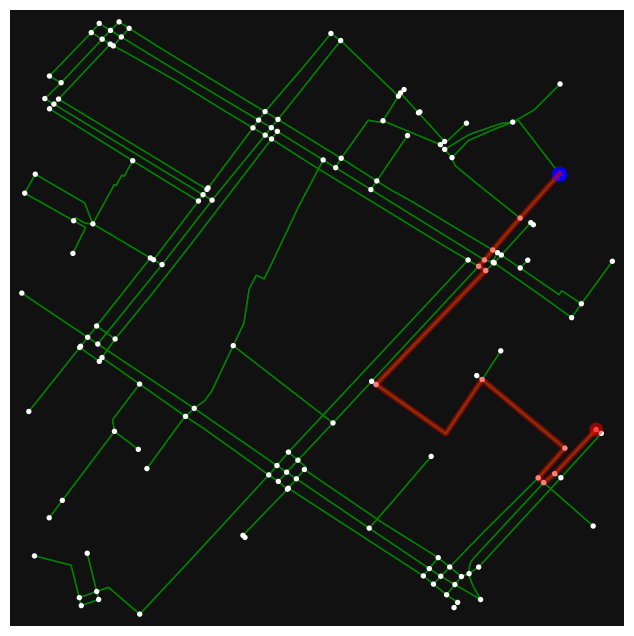

In [11]:
#display solved route
fig, ax = ox.plot_graph_route(G, show=False, close=False, route = route, edge_color = "green", route_color = "red")

ax.scatter(from_coord[1], from_coord[0], c = "blue", s = 100)

plt.show()